In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('weather_prediction_dataset.csv')
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')

In [ ]:
df.head(6)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   
5  20000106      1                  3            0.85          1.0244   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   
5                    0.56                 0.00             5.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   
5              4.2             1.9  ...                -0.6   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   
5                 4.0               3.4            0.92          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   
5                    0.55                 0.20              7.1   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  
5             3.5            10.7  

[6 rows x 165 columns]

In [ ]:
df_bbq.head(6)

DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   
5  20000106              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   
5                False                   False                 False   

   KASSEL_BBQ_weather  LJUBLJANA_BBQ_weather  MAASTRICHT_BBQ_weather  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   
5               False                  False                   False   

   MALMO_BBQ_weather  MONTELIMAR_BBQ_weather  MUENCHEN_BBQ_weather  \
0              False                   False                 False   
1              False                   False                 False   
2              False                   False                 False   
3              False                   False                 False   
4              False                   False                 False   
5              False                   False                 False   

   OSLO_BBQ_weather  PERPIGNAN_BBQ_weather  SONNBLICK_BBQ_weather  \
0             False                  False                  False   
1             False                  False                  False   
2             False                  False                  False   
3             False                  False                  False   
4             False                  False                  False   
5             False                  False                  False   

   STOCKHOLM_BBQ_weather  TOURS_BBQ_weather  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False  
5                  False              False

In [ ]:
len(df_bbq.columns), df_bbq.columns

(18,
 Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
        'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
        'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
        'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
        'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
        'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
       dtype='object'))

In [ ]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [ ]:
df.columns[30:41]

Index(['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover'],
      dtype='object')

In [ ]:
df_Dresden = df[['DATE', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max']]

In [ ]:
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];

<ipython-input-9-91915894deb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];


In [ ]:
df_Dresden.head()

DATE  DRESDEN_cloud_cover  DRESDEN_wind_speed  DRESDEN_wind_gust  \
0  20000101                    8                 3.2                7.2   
1  20000102                    7                 4.0                8.8   
2  20000103                    7                 5.4               12.1   
3  20000104                    8                 6.0               14.4   
4  20000105                    2                 5.6               15.8   

   DRESDEN_humidity  DRESDEN_global_radiation  DRESDEN_precipitation  \
0              0.89                      0.09                   0.32   
1              0.89                      0.23                   0.00   
2              0.79                      0.18                   0.00   
3              0.88                      0.11                   0.22   
4              0.76                      0.49                   0.00   

   DRESDEN_sunshine  DRESDEN_temp_mean  DRESDEN_temp_min  DRESDEN_temp_max  \
0               0.0                1.0              -1.8               2.0   
1               0.4                2.5               1.4               4.0   
2               0.0                4.2               1.3               5.1   
3               0.0                4.4               3.4               5.2   
4               5.7                1.8              -0.5               6.9   

     BBQ  
0  False  
1  False  
2  False  
3  False  
4  False

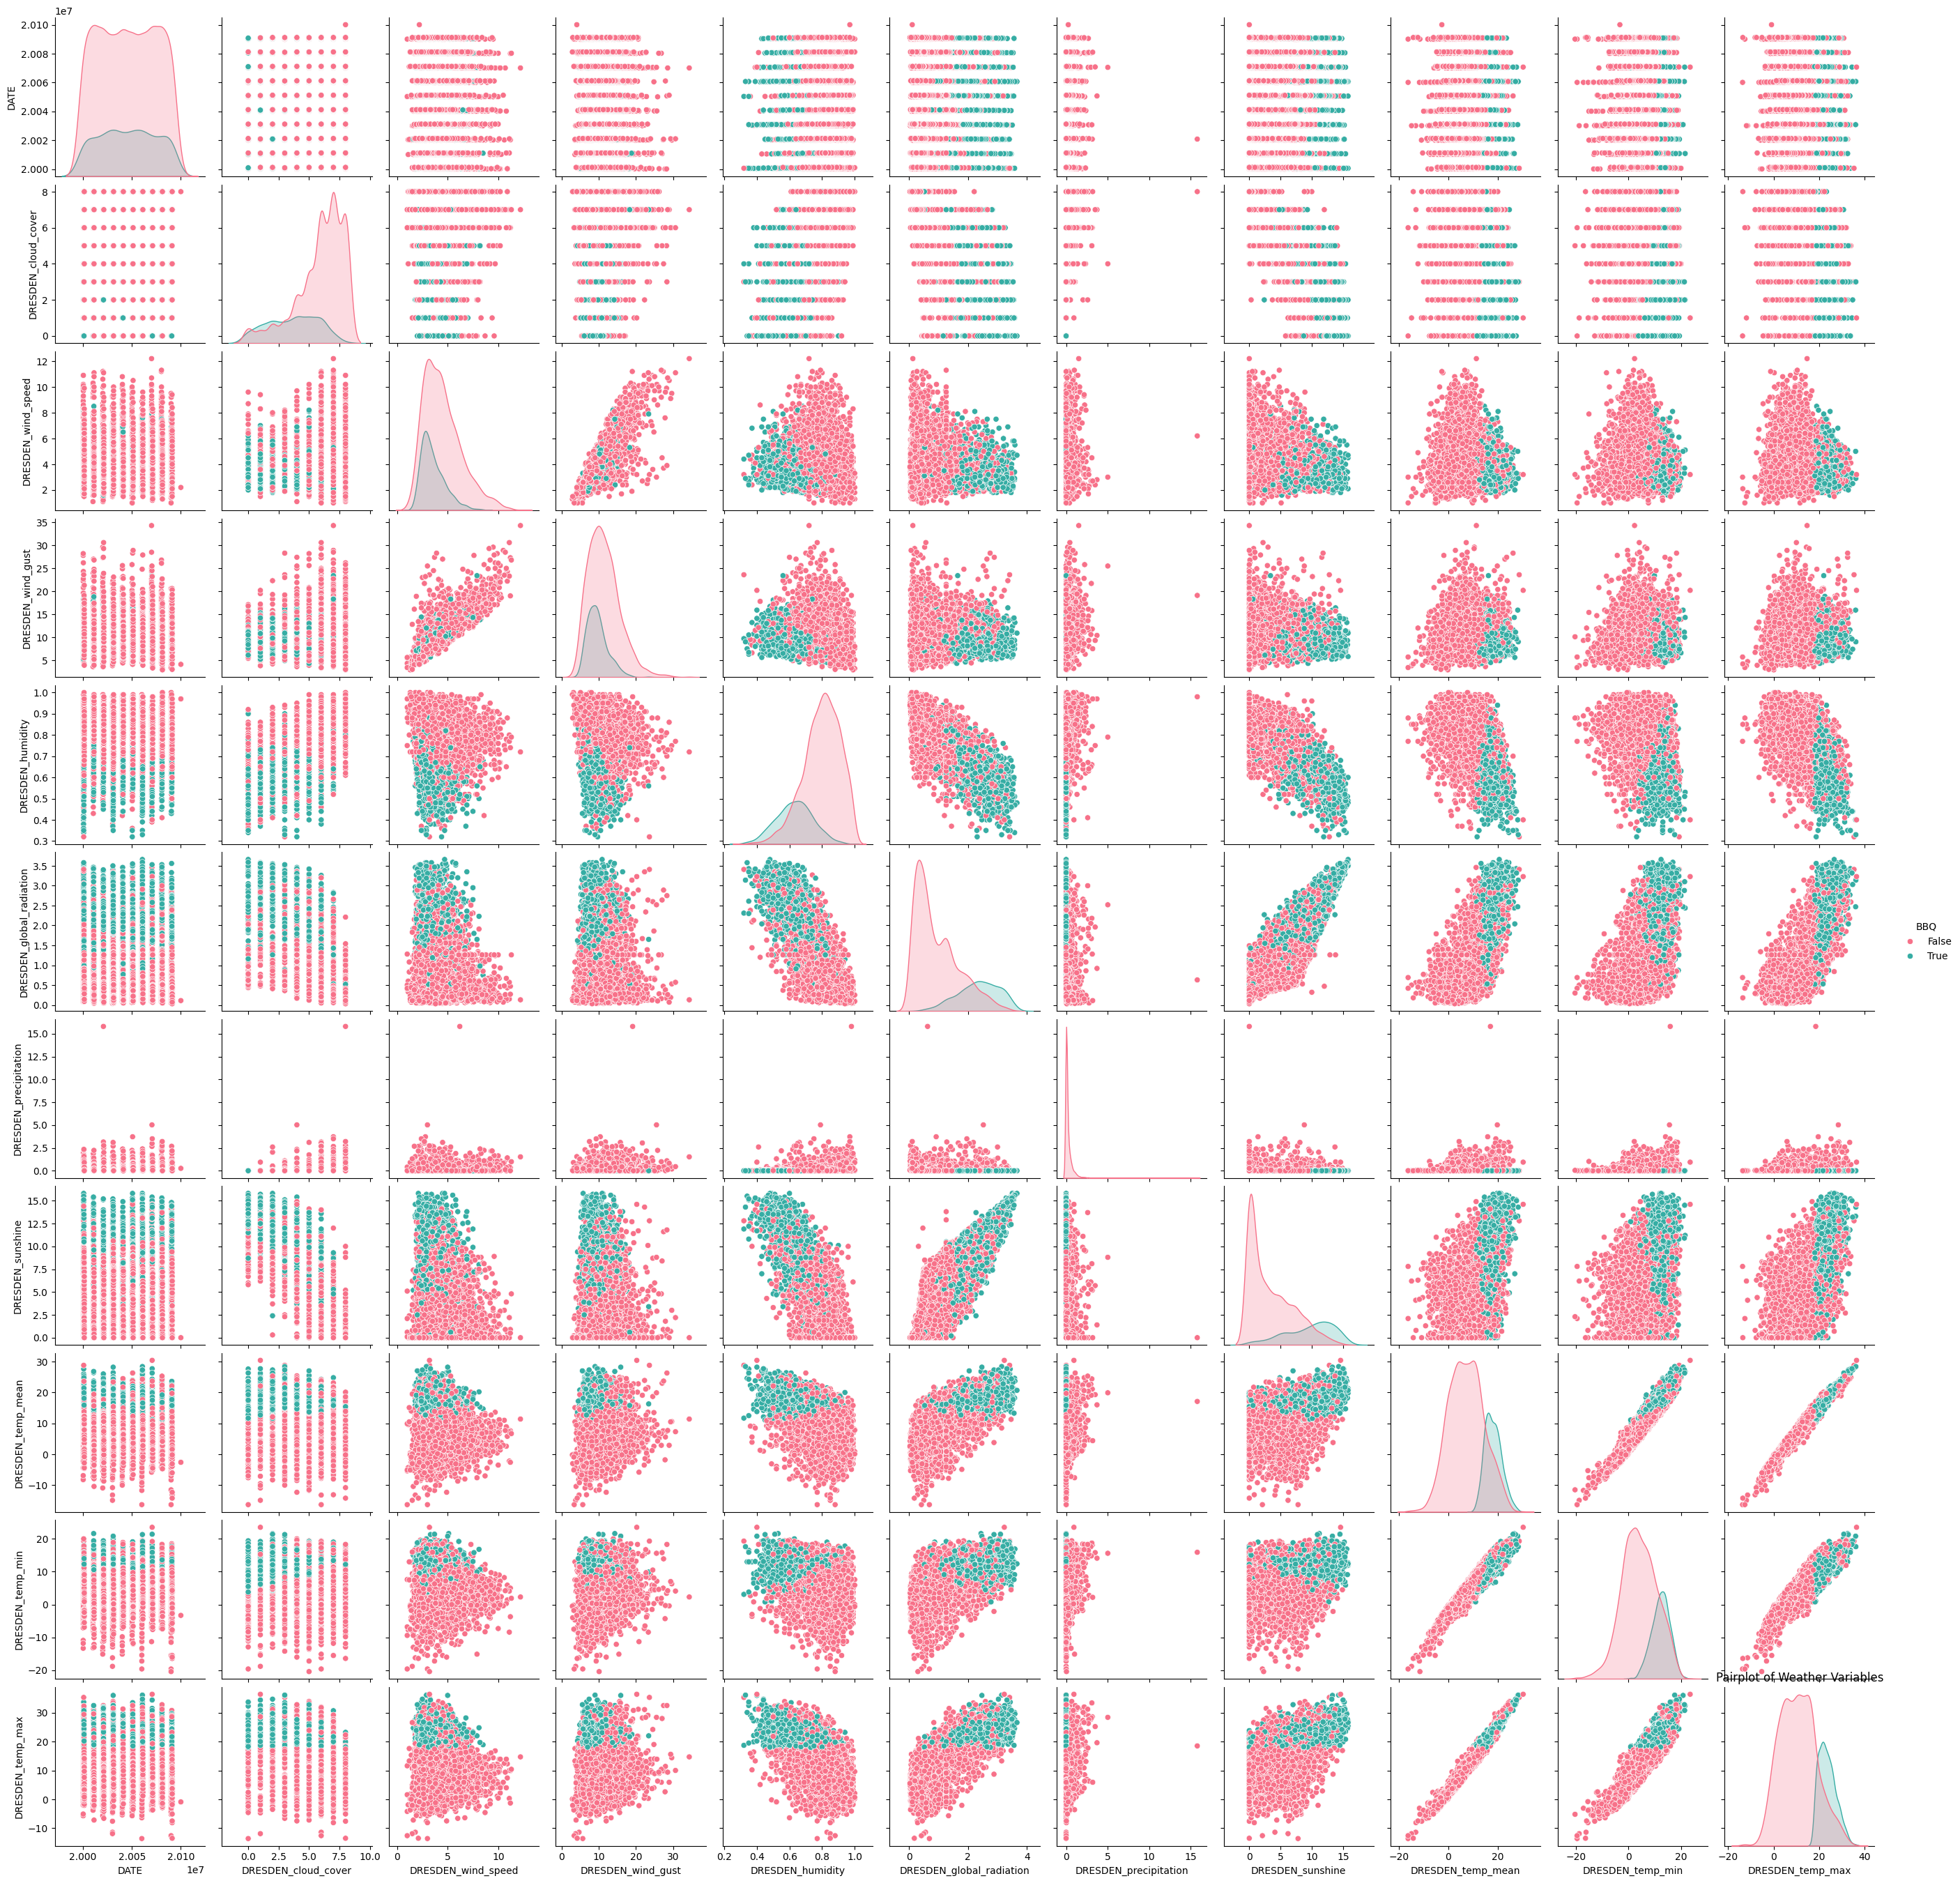

In [ ]:
sns.pairplot(df_Dresden, hue='BBQ', palette='husl')
plt.title('Pairplot of Weather Variables')
plt.show()

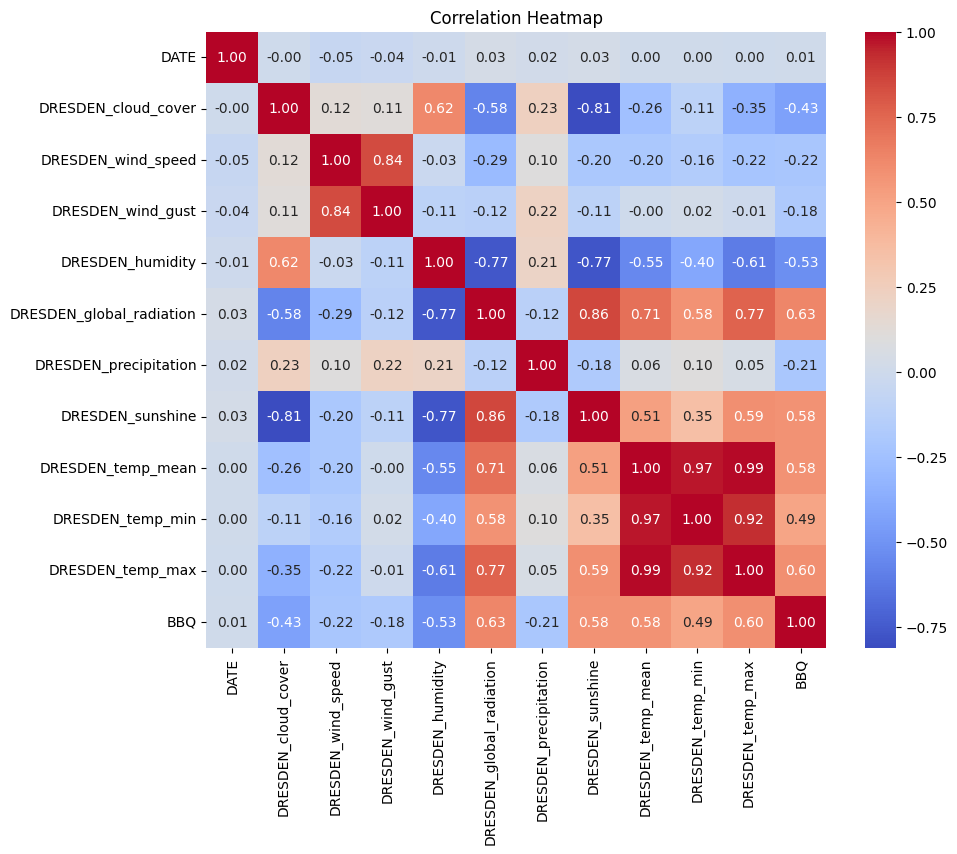

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_Dresden.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-13-615eaafe0bce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_Dresden, x='BBQ', palette='Set2')


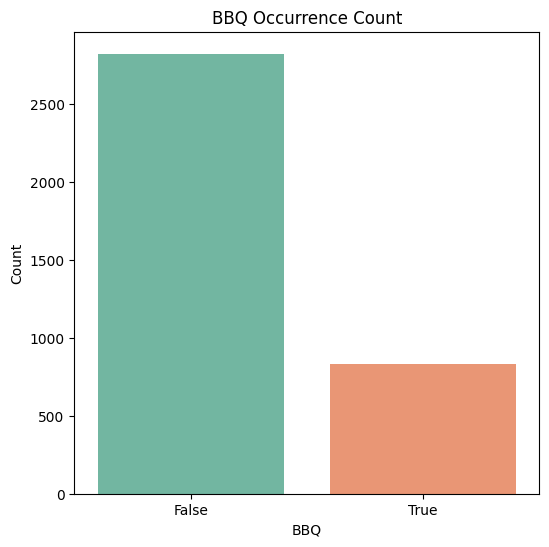

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_Dresden, x='BBQ', palette='Set2')
plt.title('BBQ Occurrence Count')
plt.xlabel('BBQ')
plt.ylabel('Count')
plt.show()

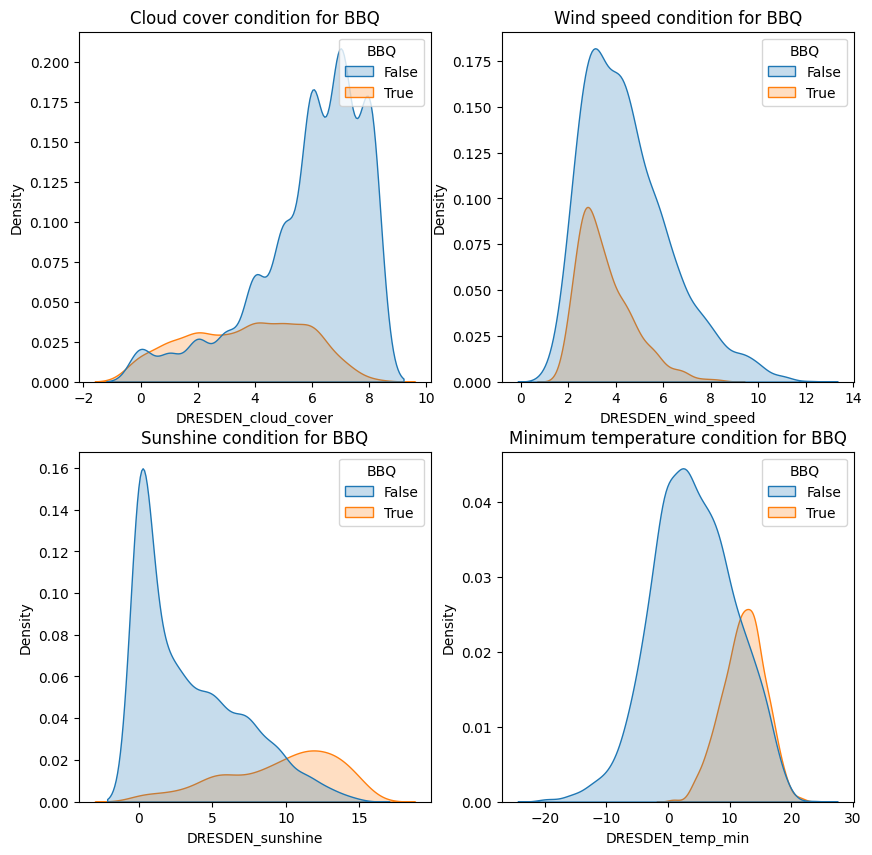

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_Dresden, x='DRESDEN_cloud_cover', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_wind_speed', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_sunshine', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_temp_min', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')

plt.show()

<ipython-input-15-581c4de05114>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_Dresden, x='DRESDEN_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])


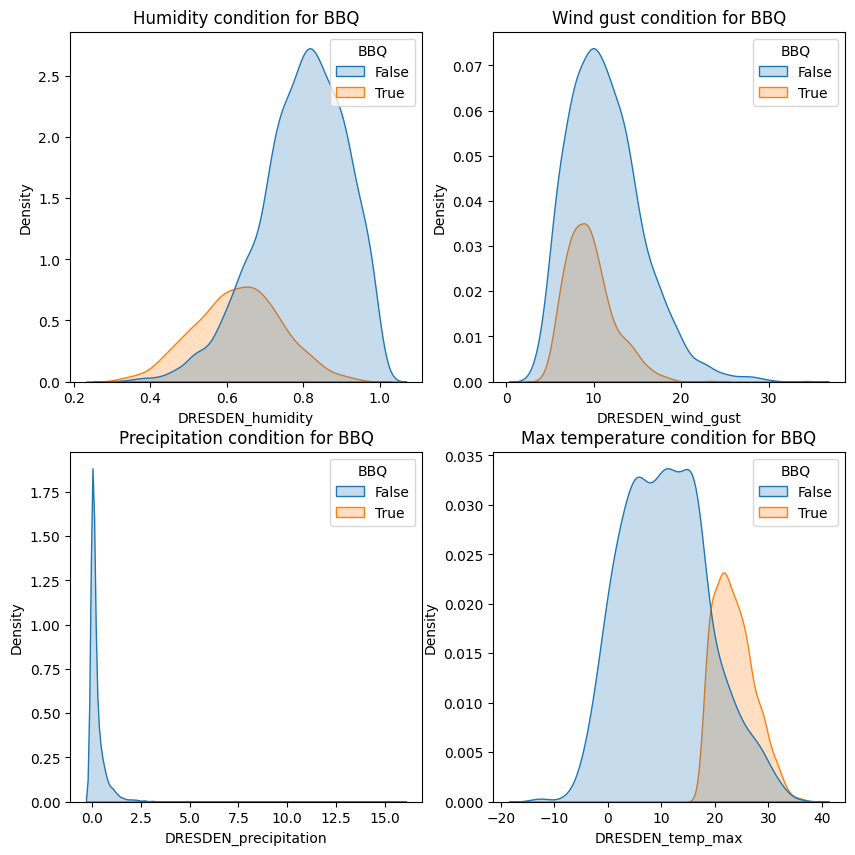

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_Dresden, x='DRESDEN_humidity', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Humidity condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_wind_gust', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind gust condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_temp_max', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Max temperature condition for BBQ')

plt.show()

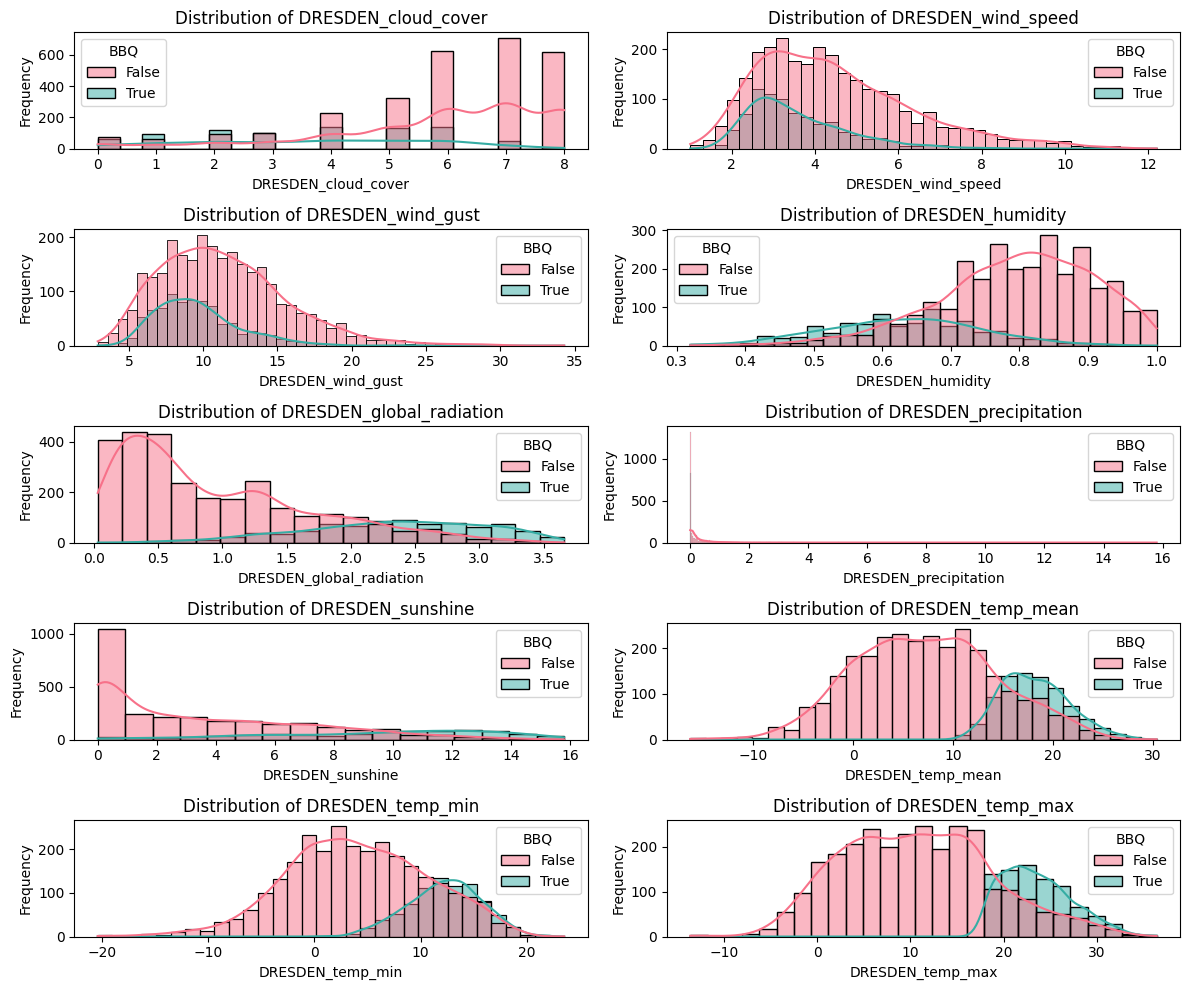

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

variables = ['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
             'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
             'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max']

for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df_Dresden, x=var, kde=True, hue='BBQ', palette='husl')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

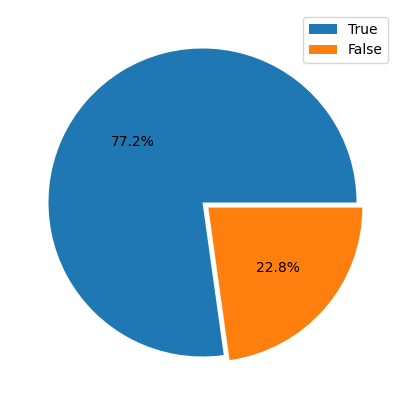

In [ ]:
plt.figure(figsize = (5,5))
explode = [0,0.05]
plt.pie(df_Dresden['BBQ'].value_counts(),
        explode=explode, autopct='%.1f%%');
plt.legend(['True', 'False']);
plt.show()

In [ ]:
df_Dresden['BBQ'] = df_Dresden['BBQ'].map({True:1, False:0});

<ipython-input-18-4e6e086fd66c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dresden['BBQ'] = df_Dresden['BBQ'].map({True:1, False:0});


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
X = df_Dresden.drop(['DATE','BBQ'], axis = 1)
y = df_Dresden['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 28)
len(X_train), len(X_test)

(2923, 731)

In [ ]:
model = Sequential([
        Dense(X_train.shape[1], activation="relu"),
        Dense(X_train.shape[1]/2, activation="relu"),
        Dense(1, activation = 'sigmoid'),
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=150,
          validation_data=(X_test, y_test), verbose=0
          )

<Axes: >

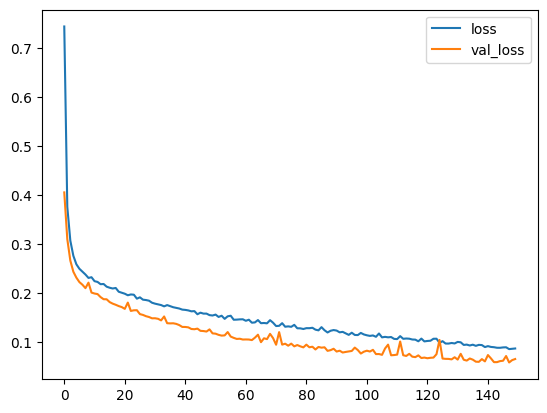

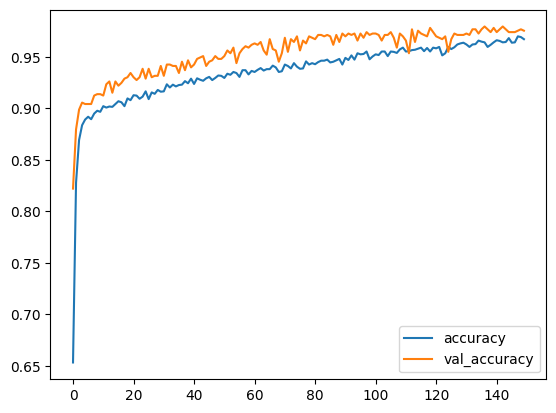

In [ ]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [ ]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test,predictions))

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       574
           1       0.90      1.00      0.95       157

    accuracy                           0.98       731
   macro avg       0.95      0.98      0.96       731
weighted avg       0.98      0.98      0.98       731



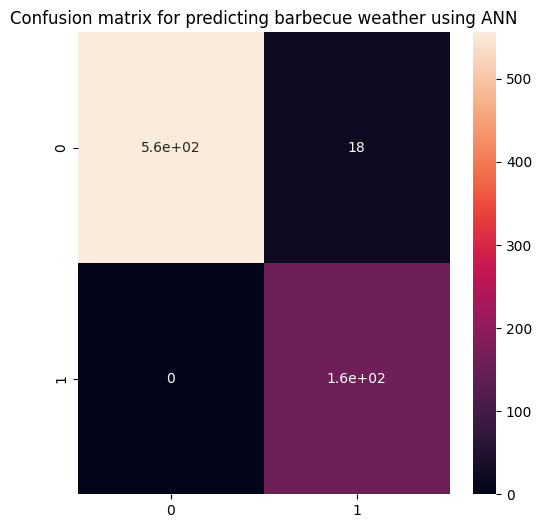

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title('Confusion matrix for predicting barbecue weather using ANN');

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, Reshape

In [ ]:
X_train.shape, X_test.shape

((2923, 10), (731, 10))

In [ ]:
model_2 = Sequential(
    [Reshape((1,X_train.shape[1],1)),
     Conv1D(filters=10, kernel_size=2, activation='relu',
            input_shape = (1,X_train.shape[1],1)),
     Flatten(),
     Dense(1, activation = 'sigmoid')
                     ])

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2.fit(x=X_train,
          y=y_train,
          epochs=150,
          validation_data=(X_test, y_test), verbose=0
          )

<Axes: >

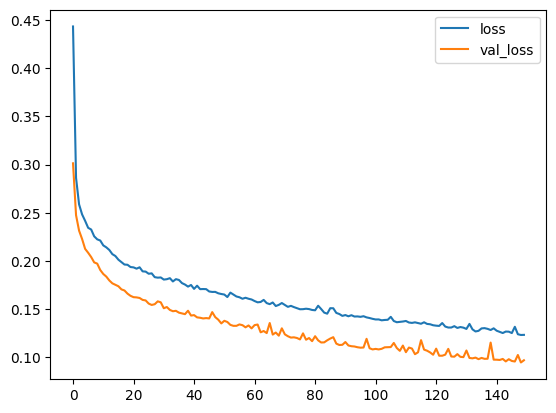

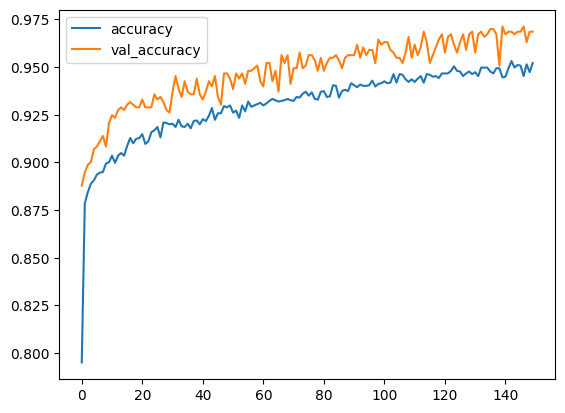

In [ ]:
model2_loss_acc = pd.DataFrame(model_2.history.history)
model2_loss_acc[['loss', 'val_loss']].plot()
model2_loss_acc[['accuracy', 'val_accuracy']].plot()

In [ ]:
pred_2 = np.round(model_2.predict(X_test))
print(classification_report(y_test,pred_2))

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       574
           1       0.94      0.92      0.93       157

    accuracy                           0.97       731
   macro avg       0.96      0.95      0.95       731
weighted avg       0.97      0.97      0.97       731



In [ ]:
cnn_acc = accuracy_score(y_test, pred_2)
cnn_acc

0.9685362517099864

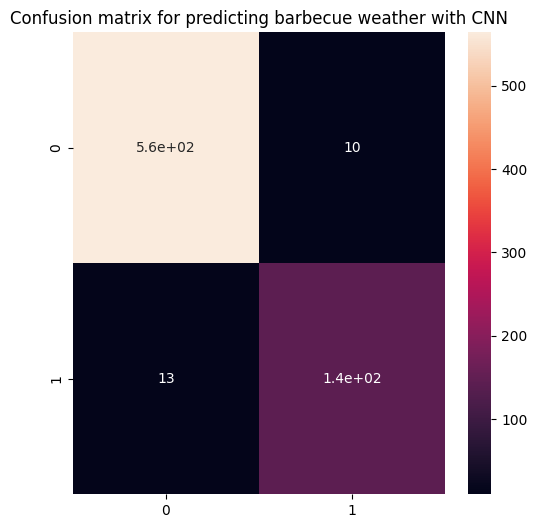

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_2), annot=True)
plt.title('Confusion matrix for predicting barbecue weather with CNN');

<ipython-input-36-bd97c483916b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Methods', y='Accuracy',
<ipython-input-36-bd97c483916b>:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x='Methods', y='Accuracy',


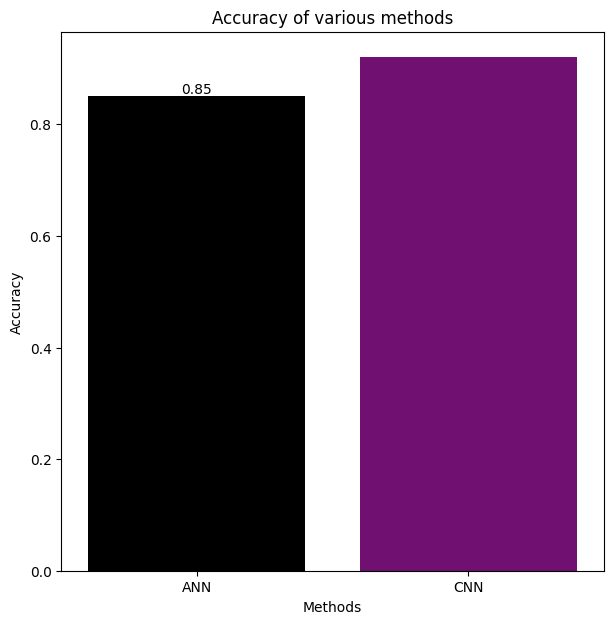

In [ ]:
ann_acc = 0.85
cnn_acc = 0.92

d = {'Methods': ['ANN', 'CNN'], 'Accuracy': [ann_acc, cnn_acc]}
dfc = pd.DataFrame(data=d)

# Specify custom colors
custom_palette = ["black", "purple"]

# Plot
plt.figure(figsize=(7, 7))
ax = sns.barplot(x='Methods', y='Accuracy',
                 data=dfc,
                 palette=custom_palette,
                 errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Accuracy of various methods')
plt.show()